In [92]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [202]:
class RunResult:
    def __init__(self, errors, evs):
        self.errors = errors
        self.evs = evs

,error,error,error,error
0,893363.440985,893363.698248,893372.316288,893363.698167
1,892898.669937,892611.122239,887118.404257,835411.223123
2,892389.787506,891786.115784,880783.839917,842564.261192
3,891830.941169,890880.416396,874470.229859,830823.649611
4,891216.608040,889891.370581,868321.045676,836504.873060
5,890546.066322,888797.663723,862522.896195,828636.169317
6,889800.962323,887609.502478,857302.049694,822960.808884
7,888993.603316,886314.693172,852949.914323,818890.164273
8,888114.099287,884898.207156,849819.688003,820681.275478
9,887149.882864,883350.808503,848220.319801,818002.932294


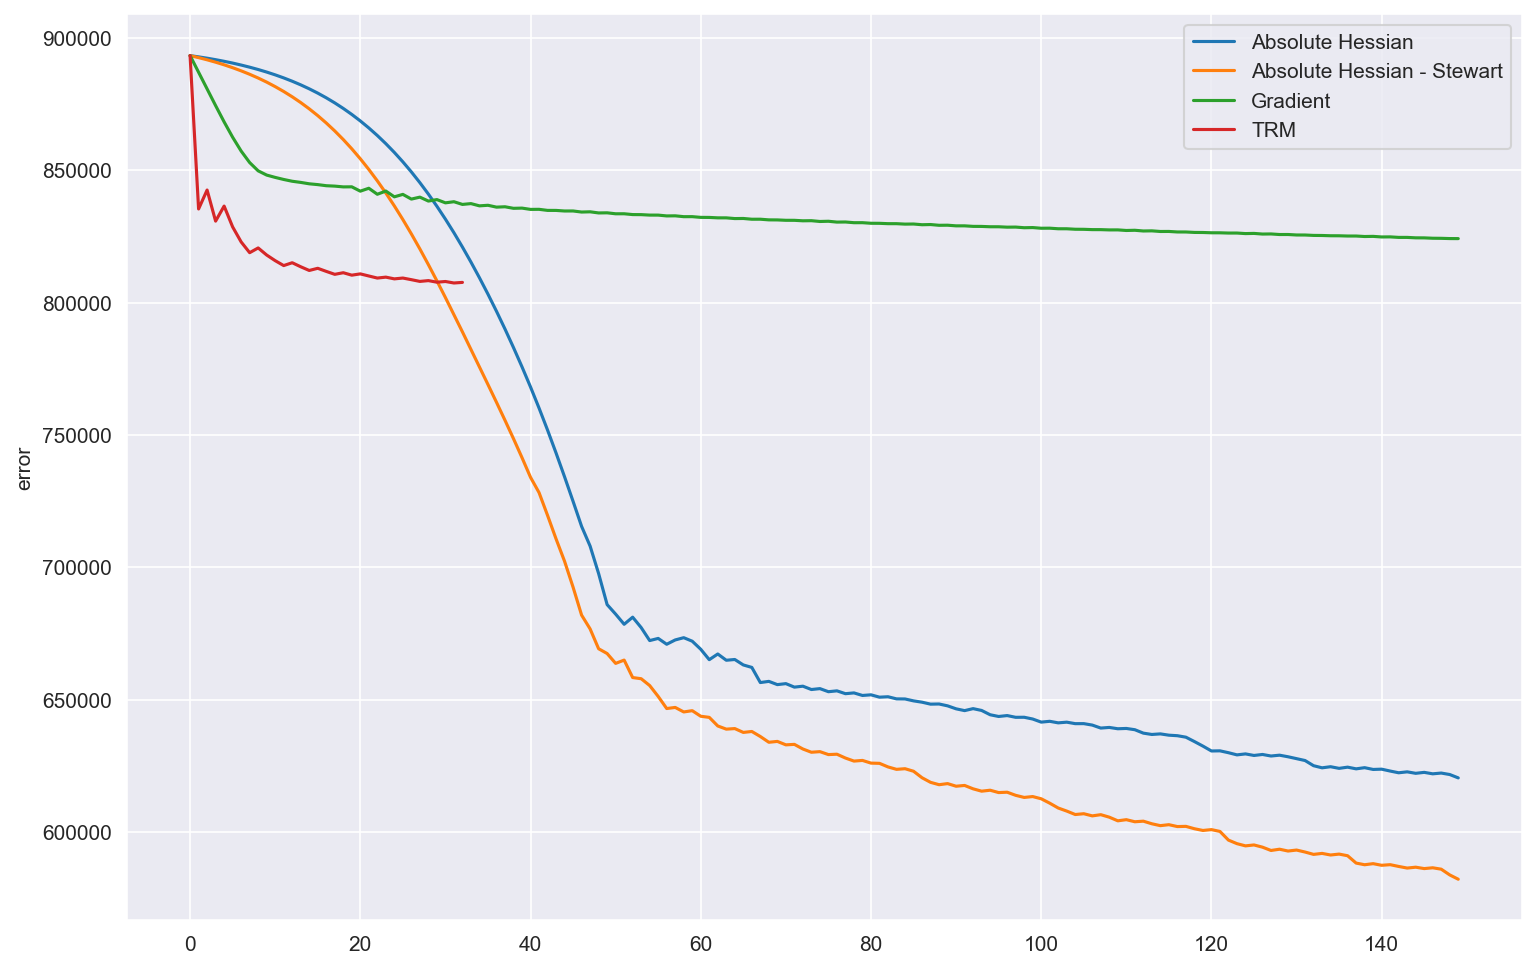

In [360]:
import os

def get_run_result(summ_dir):
    summ_fns = os.listdir(summ_dir)

    jsons = []
    errors = []
    evs = []
    for fn in summ_fns:
        with open(summ_dir + fn) as file:
            data = json.load(file)
            jsons.append(data)
            evs.append(data['evs'])
            errors.append(data['error'])

    errors = pd.Series(errors, name='error')
    evs = pd.DataFrame(evs)

    return RunResult(errors, evs)

abh = get_run_result('../../archives/abh/summaries/')
abhst = get_run_result('../../archives/abhst/summaries/')
gra = get_run_result('../../archives/gra/summaries/')
hesst = get_run_result('../../summaries/')

display(pd.concat([abh.errors, abhst.errors, gra.errors, hesst.errors], axis=1))

plt.figure(figsize=(12, 8), dpi=150)
ax = 0
for rr in [abh, abhst, gra, hesst]:
    ax = sns.lineplot(x=rr.errors.index, y=rr.errors)

ax.legend(['Absolute Hessian', 'Absolute Hessian - Stewart', 'Gradient', 'TRM'])

<AxesSubplot:>

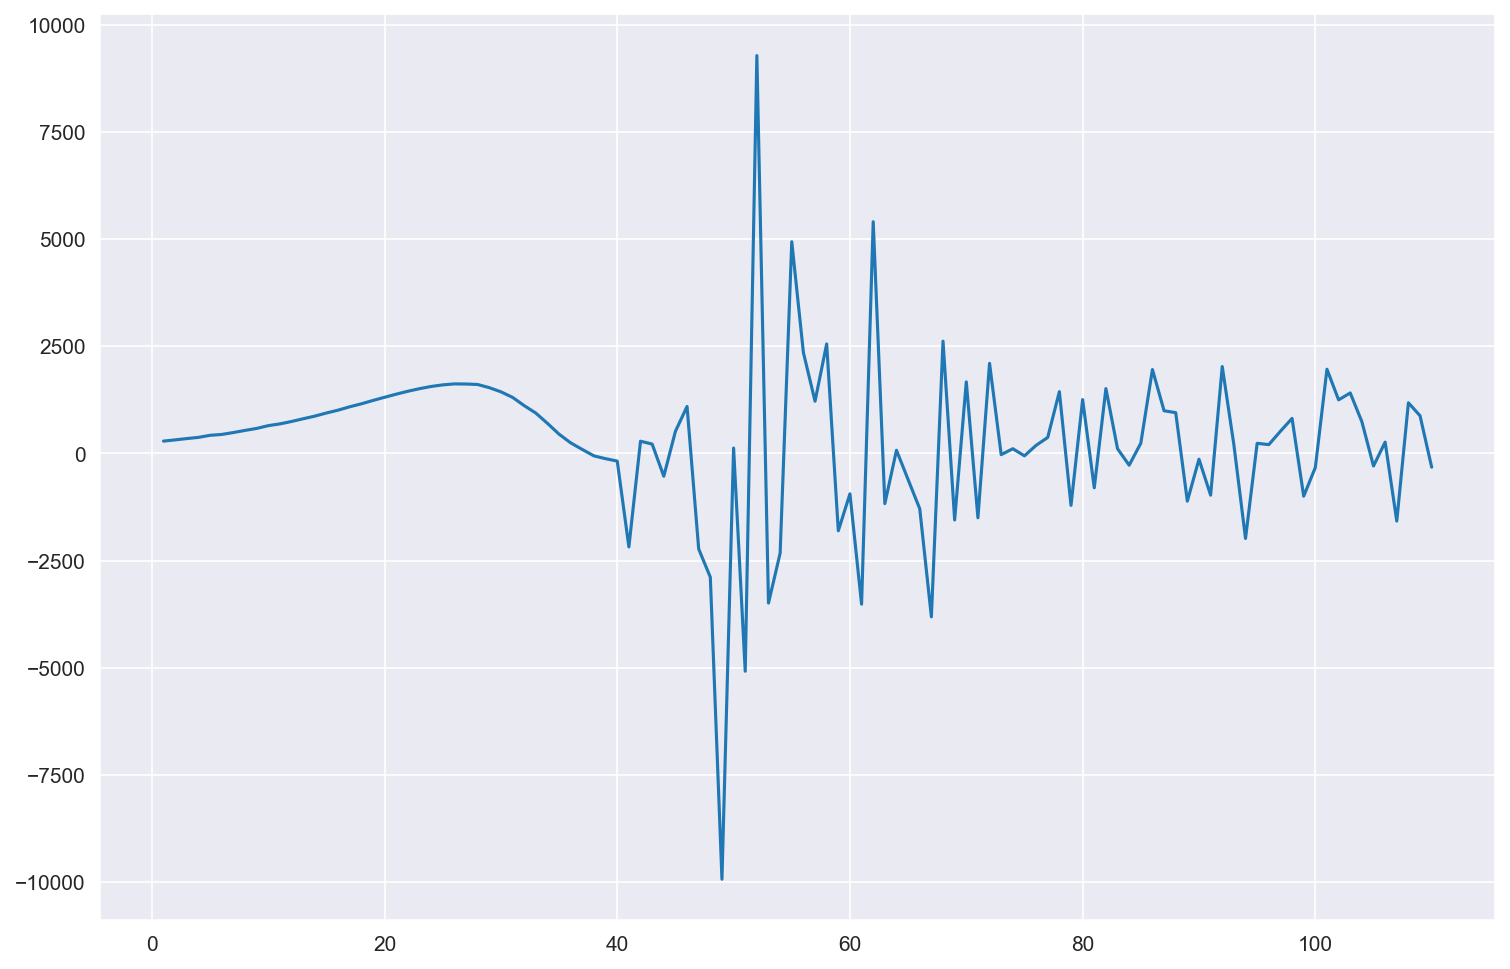

In [315]:
endn = len(abhst.errors) - 1
ggs = []

for i in range(1, endn):
    g = abh.errors[i] - abh.errors[i - 1]
    stg = abhst.errors[i] - abhst.errors[i - 1]
    ggs.append(g - stg)

plt.figure(figsize=(12, 8), dpi=150)
sns.lineplot(x=[x for x in range(1, endn)], y=ggs)

In [343]:
display(abh.evs)
display(abhst.evs)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,-3.450493e+09,-4.892329e+08,-3.661021e+08,-2.172267e+08,-1.129083e+08,-7.601206e+07,-3.638095e+07,-1.683133e+07,-1.585075e+07,-9.747281e+06,-2.422833e+06,-1.717136e+06,-1.433502e+06,-505863.332576,-383418.656700,-145682.555081,-83646.903670,-10097.971279,-8883.037079,-417.180880,84978.739293,209591.540839,893281.267658,1.562425e+06,3.388382e+06,3.690368e+06,9.670434e+06,1.947118e+07,1.067061e+08,2.117435e+08,2.509236e+08,4.061927e+08,5.167637e+08,6.716952e+08,1.180214e+09,4.721665e+09,4.624709e+10
1,-3.450526e+09,-4.892405e+08,-3.661067e+08,-2.172225e+08,-1.129083e+08,-7.601217e+07,-3.638054e+07,-1.683153e+07,-1.585152e+07,-9.747769e+06,-2.422820e+06,-1.717142e+06,-1.433533e+06,-505801.341013,-383486.085334,-145649.810954,-83650.787045,-10103.233662,-8865.097730,-416.850144,85139.132154,209654.242587,892829.230474,1.562452e+06,3.388149e+06,3.690050e+06,9.669049e+06,1.947112e+07,1.067053e+08,2.117235e+08,2.509158e+08,4.061910e+08,5.167553e+08,6.716820e+08,1.180190e+09,4.721672e+09,4.624727e+10
2,-3.450565e+09,-4.892498e+08,-3.661122e+08,-2.172195e+08,-1.129085e+08,-7.601299e+07,-3.637976e+07,-1.683174e+07,-1.585239e+07,-9.748426e+06,-2.422835e+06,-1.717150e+06,-1.433587e+06,-505732.619023,-383543.579442,-145608.058641,-83652.437565,-10109.112768,-8844.558545,-416.406653,85321.172793,209727.430073,892485.290860,1.562514e+06,3.387805e+06,3.689656e+06,9.666834e+06,1.947102e+07,1.067046e+08,2.116919e+08,2.509092e+08,4.061884e+08,5.167475e+08,6.716676e+08,1.180169e+09,4.721677e+09,4.624749e+10
3,-3.450615e+09,-4.892616e+08,-3.661181e+08,-2.172201e+08,-1.129090e+08,-7.601570e+07,-3.637897e+07,-1.683193e+07,-1.585330e+07,-9.749568e+06,-2.422802e+06,-1.717017e+06,-1.433697e+06,-505658.656554,-383625.285064,-145571.813969,-83658.748649,-10114.478033,-8821.001408,-415.960312,85533.694010,209812.136683,891982.609776,1.562660e+06,3.387485e+06,3.689217e+06,9.664202e+06,1.947083e+07,1.067040e+08,2.116636e+08,2.509067e+08,4.061863e+08,5.167411e+08,6.716552e+08,1.180162e+09,4.721697e+09,4.624777e+10
4,-3.450669e+09,-4.892739e+08,-3.661246e+08,-2.172209e+08,-1.129093e+08,-7.601814e+07,-3.637739e+07,-1.683211e+07,-1.585423e+07,-9.751141e+06,-2.422803e+06,-1.716922e+06,-1.433825e+06,-505581.326144,-383704.254837,-145528.901117,-83662.349200,-10121.261914,-8795.893597,-415.454405,85757.500068,209896.105344,891500.414094,1.562824e+06,3.387088e+06,3.688651e+06,9.660895e+06,1.947061e+07,1.067033e+08,2.116277e+08,2.509042e+08,4.061836e+08,5.167305e+08,6.716387e+08,1.180145e+09,4.721715e+09,4.624806e+10
5,-3.450724e+09,-4.892847e+08,-3.661313e+08,-2.172147e+08,-1.129090e+08,-7.601974e+07,-3.637602e+07,-1.683231e+07,-1.585511e+07,-9.752422e+06,-2.422791e+06,-1.716876e+06,-1.433891e+06,-505521.876659,-383797.413823,-145483.277303,-83666.066582,-10130.046589,-8768.703267,-414.972851,86003.002284,209980.541177,890961.408805,1.562912e+06,3.386706e+06,3.688126e+06,9.657822e+06,1.947045e+07,1.067023e+08,2.115911e+08,2.508933e+08,4.061804e+08,5.167173e+08,6.716206e+08,1.180115e+09,4.721729e+09,4.624830e+10
6,-3.450789e+09,-4.892967e+08,-3.661390e+08,-2.172112e+08,-1.129088e+08,-7.602303e+07,-3.637442e+07,-1.683249e+07,-1.585606e+07,-9.754179e+06,-2.422730e+06,-1.716638e+06,-1.433994e+06,-505428.091196,-383883.303149,-145430.831237,-83670.345138,-10137.379378,-8737.736883,-414.374107,86281.400168,210090.013981,890405.571881,1.563065e+06,3.386248e+06,3.687478e+06,9.654352e+06,1.947024e+07,1.067012e+08,2.115496e+08,2.508849e+08,4.061766e+08,5.167048e+08,6.716013e+08,1.180091e+09,4.721746e+09,4.624857e+10
7,-3.450860e+09,-4.893103e+08,-3.661471e+08,-2.172090e+08,-1.129086e+08,-7.602639e+07,-3.637249e+07,-1.683266e+07,-1.585701e+07,-9.756194e+06,-2.422725e+06,-1.716495e+06,-1.434128e+06,-505338.076565,-383986.808011,-145377.777985,-83674.342400,-10146.760198,-8704.621807,-413.766016,86582.943902,210204.330233,889745.441563,1.563247e+06,3.385784e+06,3.686780e+06,9

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,-3.485273e+09,-5.003064e+08,-3.707954e+08,-2.216023e+08,-1.139962e+08,-7.978325e+07,-3.744266e+07,-1.808857e+07,-1.641183e+07,-1.041610e+07,-2.655526e+06,-2.111742e+06,-1.445904e+06,-554902.017336,-384522.568234,-179888.008217,-92122.872906,-14313.173994,-2373.614173,-527.107312,112321.446181,180529.198486,324490.214821,1.549816e+06,2.826783e+06,3.566735e+06,7.629516e+06,1.941756e+07,1.061999e+08,2.114787e+08,2.481304e+08,4.034590e+08,5.133086e+08,6.663387e+08,1.170694e+09,4.686268e+09,4.621812e+10
1,-3.485322e+09,-5.003038e+08,-3.707970e+08,-2.215863e+08,-1.139945e+08,-7.977941e+07,-3.744118e+07,-1.808798e+07,-1.641192e+07,-1.041642e+07,-2.655051e+06,-2.111573e+06,-1.445898e+06,-554912.676718,-384622.783837,-179863.688226,-92112.521157,-14317.561097,-2372.805396,-526.968554,112351.443308,180598.487341,324579.249573,1.549842e+06,2.826966e+06,3.566173e+06,7.628689e+06,1.941757e+07,1.061991e+08,2.114399e+08,2.481136e+08,4.034585e+08,5.133007e+08,6.663258e+08,1.170662e+09,4.686331e+09,4.621833e+10
2,-3.485382e+09,-5.003032e+08,-3.707992e+08,-2.215735e+08,-1.139929e+08,-7.977812e+07,-3.743932e+07,-1.808717e+07,-1.641197e+07,-1.041742e+07,-2.654464e+06,-2.111311e+06,-1.445957e+06,-554912.054000,-384704.669924,-179832.820701,-92097.761501,-14320.058024,-2372.006983,-526.680040,112400.902955,180678.463012,324671.085024,1.549963e+06,2.827148e+06,3.565480e+06,7.627566e+06,1.941748e+07,1.061986e+08,2.113946e+08,2.481009e+08,4.034583e+08,5.132971e+08,6.663140e+08,1.170652e+09,4.686407e+09,4.621862e+10
3,-3.485448e+09,-5.003038e+08,-3.708016e+08,-2.215600e+08,-1.139914e+08,-7.977607e+07,-3.743660e+07,-1.808632e+07,-1.641203e+07,-1.041904e+07,-2.653844e+06,-2.111058e+06,-1.446053e+06,-554923.207814,-384807.764233,-179801.105827,-92081.165268,-14322.982451,-2371.659427,-526.371998,112443.417537,180747.745963,324762.875446,1.550125e+06,2.827324e+06,3.564683e+06,7.625631e+06,1.941737e+07,1.061981e+08,2.113456e+08,2.480880e+08,4.034585e+08,5.132916e+08,6.662991e+08,1.170633e+09,4.686493e+09,4.621893e+10
4,-3.485519e+09,-5.003022e+08,-3.708042e+08,-2.215409e+08,-1.139892e+08,-7.977424e+07,-3.743406e+07,-1.808515e+07,-1.641214e+07,-1.042062e+07,-2.653030e+06,-2.110690e+06,-1.446111e+06,-554930.957389,-384929.155008,-179766.978160,-92063.265946,-14325.432024,-2371.327652,-526.028973,112501.749262,180824.537509,324859.070274,1.550258e+06,2.827523e+06,3.563821e+06,7.624049e+06,1.941729e+07,1.061975e+08,2.112920e+08,2.480692e+08,4.034584e+08,5.132854e+08,6.662853e+08,1.170616e+09,4.686585e+09,4.621922e+10
5,-3.485593e+09,-5.002987e+08,-3.708067e+08,-2.215176e+08,-1.139866e+08,-7.977141e+07,-3.743150e+07,-1.808367e+07,-1.641226e+07,-1.042214e+07,-2.652215e+06,-2.110312e+06,-1.446147e+06,-554932.290632,-385061.439853,-179732.883555,-92042.479059,-14329.393759,-2370.690002,-525.698708,112563.751015,180907.866343,324973.025145,1.550370e+06,2.827769e+06,3.562874e+06,7.622673e+06,1.941726e+07,1.061967e+08,2.112320e+08,2.480458e+08,4.034578e+08,5.132780e+08,6.662694e+08,1.170587e+09,4.686678e+09,4.621951e+10
6,-3.485680e+09,-5.002983e+08,-3.708099e+08,-2.215001e+08,-1.139843e+08,-7.976943e+07,-3.742790e+07,-1.808243e+07,-1.641234e+07,-1.042418e+07,-2.651309e+06,-2.109925e+06,-1.446267e+06,-554943.846683,-385177.120517,-179691.404543,-92017.895652,-14332.408974,-2370.033761,-525.242264,112624.905236,180986.747714,325097.447656,1.550584e+06,2.828007e+06,3.561805e+06,7.620379e+06,1.941710e+07,1.061959e+08,2.111663e+08,2.480293e+08,4.034578e+08,5.132727e+08,6.662518e+08,1.170568e+09,4.686788e+09,4.621988e+10
7,-3.485773e+09,-5.002949e+08,-3.708127e+08,-2.214738e+08,-1.139811e+08,-7.976655e+07,-3.742447e+07,-1.808081e+07,-1.641249e+07,-1.042605e+07,-2.650344e+06,-2.109462e+06,-1.446325e+06,-554958.078991,-385364.734009,-179649.783531,-91994.958077,-14337.468178,-2369.474910,-524.854590,112697.039756,181071.545511,325225.141939,1.550733e+06,2.828267e+06,3.5606

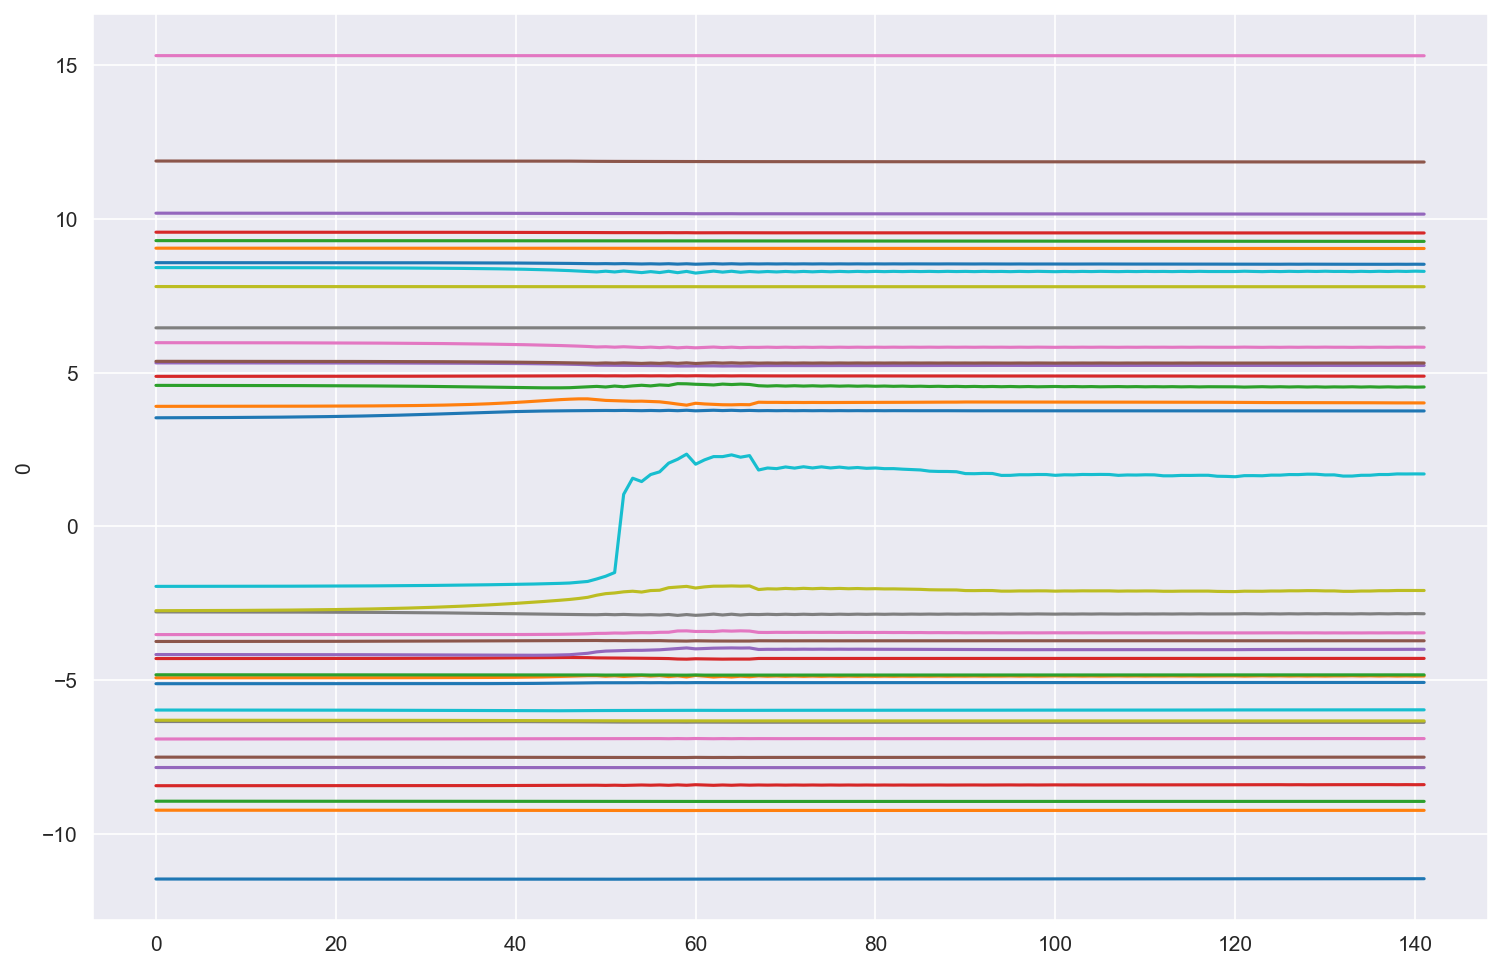

In [196]:
logevs = np.sign(evs) * evs.abs() ** (1 / 9)
# logevs = np.sign(evs) * np.log10(evs.abs())

plt.figure(figsize=(12, 8), dpi=150)
for i in range(len(logevs.columns)):
    sns.lineplot(x=logevs.index, y=logevs[i])

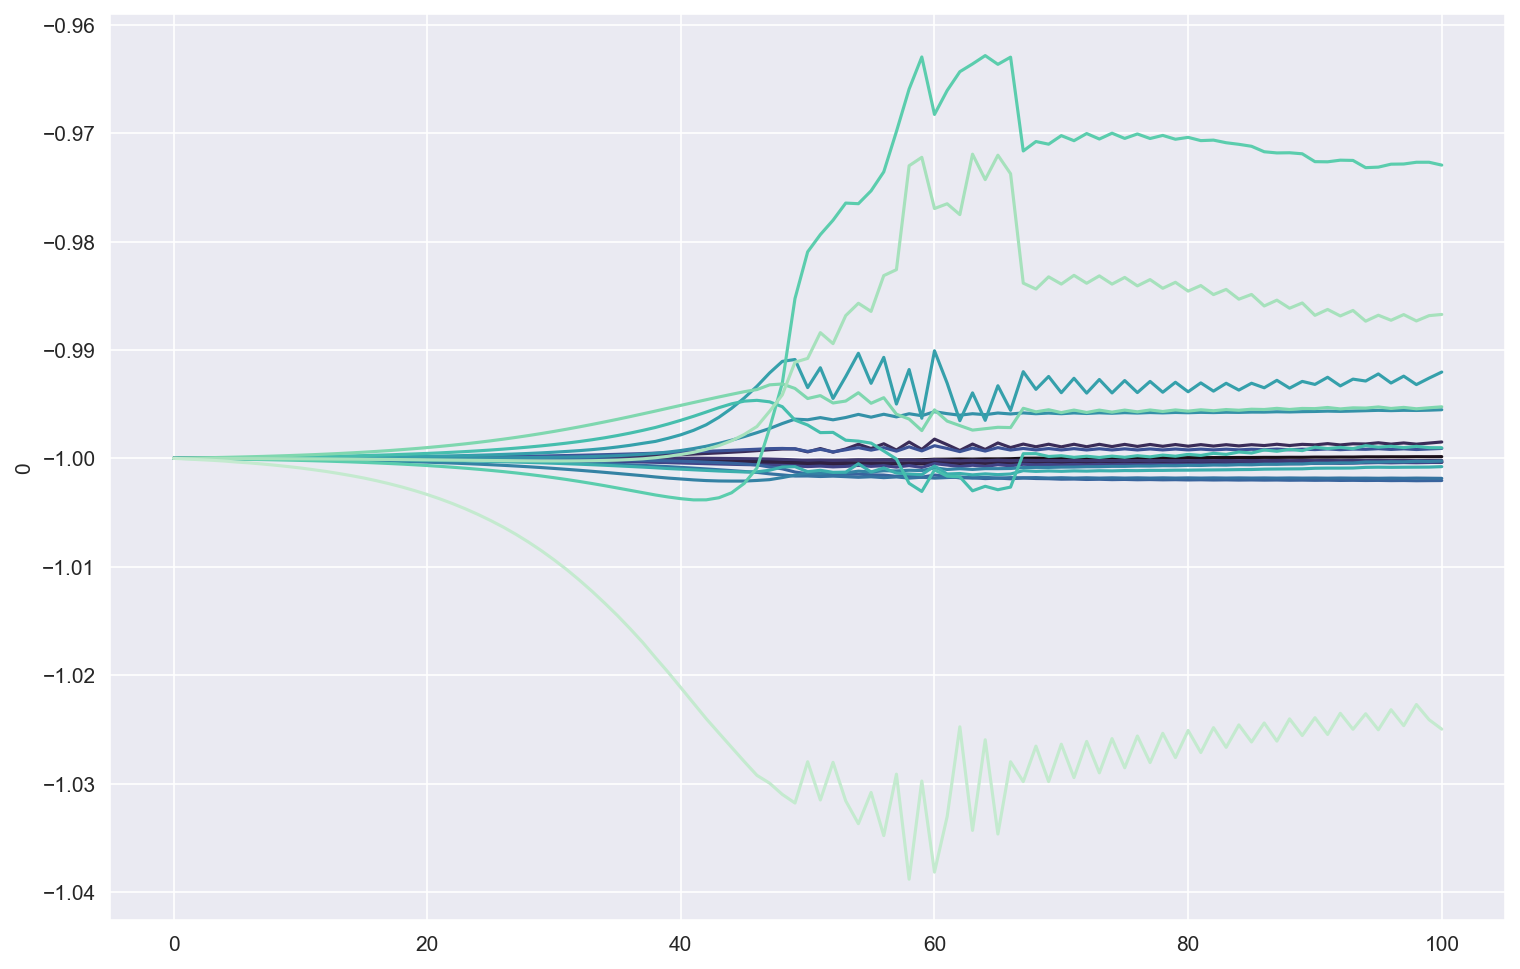

In [181]:
plt.figure(figsize=(12, 8), dpi=150)

n = len(logevs.columns)
n = 18
pal = sns.color_palette('mako', n)
for i in range(n):
    sns.lineplot(x=logevs.index, y=logevs[i] / abs(logevs.iloc[0, i]), color=pal[i])